<a href="https://colab.research.google.com/github/rezaafsharniakan/Classificationethod-KNN/blob/main/keras_cifar10_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 3s 0us/step
[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 49s 30ms/step - loss: 1.8306 - accuracy: 0.3507 - val_loss: 1.7311 - val_accuracy: 0.3753
Epoch 2/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6476 - accuracy: 0.4189 - val_loss: 1.5961 - val_accuracy: 0.4266
Epoch 3/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5646 - accuracy: 0.4472 - val_loss: 1.5641 - val_accuracy: 0.4358
Epoch 4/100
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5069 - accuracy: 0.4676 - val_loss: 1.4864 - val_accuracy: 0.4759
Epoch 5/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4593 - accuracy: 0.4848 - val_loss: 1.5169 - val_accuracy: 0.4634
Epoch 6/100
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4190 - accuracy: 0.4972 - val_loss: 1.4654 - val_accuracy:

KeyError: ignored

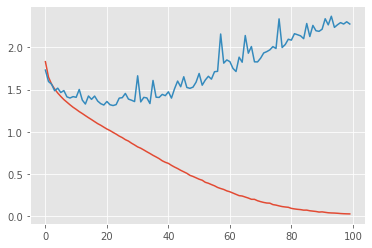

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=32)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=labelNames))
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig("output.jpg")
plt.show()